# **MADRID AIRBNB**

## 1. Importacion de librerias

In [1]:
#Librerias de analisis de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## 2. Exploracion basica de los datos

Estas son las variables que contiene nuestra dataset:

+ **ID:** Numero de indentificador del hospedaje
+ **Name:** Nombre del hospedaje
+ **Host_id:** Numero de indentificador del propietario
+ **Host_name:** Nombre del propietario
+ **Neigbourhood_group:** Distrito
+ **Neighbourhood:** Barrio
+ **Latitud:** Latitud 
+ **Longitude:** Longitud
+ **Room_type:** Tipo de Hospedaje
+ **Price:** Precio
+ **Minimun_nights:** Minimo de noches
+ **Number_of_reviews:** Número de reseñas
+ **Last_review:** Ultima reseñas
+ **Reviews_per_month:** Reseñas por mes
+ **Calculated_host_listings_count:** Cantidad de inmuebles por propietario
+ **Availability_365:** Disponibilidad anual

In [2]:
# Buenas practicas

path_to_data = "./madrid_airbnb.csv"
df = pd.read_csv(path_to_data)

In [3]:
#Cantidad de entradas y columnas del dataset
df.shape

(19618, 16)

In [4]:
# Ver las primeras cinco entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,78,2020-09-20,0.58,1,180
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-07-15,0.42,2,364
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,NaN,NaN,7,1
3,24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,10,2020-03-01,0.13,1,72
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,149,2020-03-12,1.12,1,365


In [5]:
# Agrupamos los distritos para poder observar cuantas entradas hay.
df_group1 = df.groupby("neighbourhood_group").count()
df_group1

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Arganzuela,1104,1104,1104,1069,1104,1104,1104,1104,1104,1104,1104,805,805,1104,1104
Barajas,172,172,172,166,172,172,172,172,172,172,172,114,114,172,172
Carabanchel,708,708,708,699,708,708,708,708,708,708,708,445,445,708,708
Centro,8649,8647,8649,8424,8649,8649,8649,8649,8649,8649,8649,6781,6781,8649,8649
Chamartín,580,580,580,565,580,580,580,580,580,580,580,390,390,580,580
Chamberí,1252,1252,1252,1226,1252,1252,1252,1252,1252,1252,1252,753,753,1252,1252
Ciudad Lineal,649,649,649,634,649,649,649,649,649,649,649,424,424,649,649
Fuencarral - El Pardo,315,315,315,308,315,315,315,315,315,315,315,200,200,315,315
Hortaleza,364,364,364,352,364,364,364,364,364,364,364,254,254,364,364


Observamos que hay 21 distritos, el centro tiene mayor cantidad de alquileres disponibles con 8649 y el menor viene a ser Vicalvaro con 72 anuncios de alquiler.

In [6]:
#Vemos cuantos alquileres hay por distrito:

df["neighbourhood_group"].value_counts()

Centro                   8649
Salamanca                1324
Chamberí                 1252
Arganzuela               1104
Tetuán                    816
Carabanchel               708
Retiro                    664
Ciudad Lineal             649
Puente de Vallecas        617
Latina                    608
Chamartín                 580
Moncloa - Aravaca         554
San Blas - Canillejas     497
Hortaleza                 364
Fuencarral - El Pardo     315
Usera                     280
Villaverde                177
Barajas                   172
Moratalaz                 118
Villa de Vallecas          98
Vicálvaro                  72
Name: neighbourhood_group, dtype: int64

Vemos que nuestro top 3 de alquileres se encuentran en: **Centro, Salamanca y Chamberí.**

In [7]:
#Vemos el tipo de alojamiento:

df["room_type"].value_counts()

Entire home/apt    11314
Private room        7809
Shared room          329
Hotel room           166
Name: room_type, dtype: int64

La categoria de Entire Home/apt representa un **57.67%** del total de los alquileres

In [8]:
#Cantidad de hospedajes por host_id:

df["host_id"].value_counts().head(10)

377605855    163
28038703     113
276565844    101
102196656    101
32046323      92
107141654     88
99018982      72
247570318     69
28786243      67
107335103     66
Name: host_id, dtype: int64

Hay algunos propietarios que tienen mas de 100 inmuebles en alquiler en Madrid.

In [9]:
#Describe cualitativo:
df_group2 = df[["neighbourhood_group", "neighbourhood"]]
df_group2.describe()


,neighbourhood_group,neighbourhood
count,19618,19618
unique,21,128
top,Centro,Embajadores
freq,8649,2318


Comprobamos que Centro es el distrito con mas anuncios, puntualmente en el barrio **Embajadores**. 

In [10]:
#Informacion sobre el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19618 entries, 0 to 19617
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19618 non-null  int64  
 1   name                            19615 non-null  object 
 2   host_id                         19618 non-null  int64  
 3   host_name                       19091 non-null  object 
 4   neighbourhood_group             19618 non-null  object 
 5   neighbourhood                   19618 non-null  object 
 6   latitude                        19618 non-null  float64
 7   longitude                       19618 non-null  float64
 8   room_type                       19618 non-null  object 
 9   price                           19618 non-null  int64  
 10  minimum_nights                  19618 non-null  int64  
 11  number_of_reviews               19618 non-null  int64  
 12  last_review                     

Se han perdido unos datos en name y faltan muchos mas datos en host_name. La mayor cantidad de perdidas en las entradas esta en last_review y reviews_per_month, la cantidad de entradas perdidas es la misma en ambas columnas. En el futuro se decidira que hacer con estos datos. A continuación, se muestran los valores que faltan:

In [11]:
df.isnull().sum(axis =0)

id                                   0
name                                 3
host_id                              0
host_name                          527
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5637
reviews_per_month                 5637
calculated_host_listings_count       0
availability_365                     0
dtype: int64

Podemos ver que en name solo nos faltan tres. En host_name tenemos 527 perdidas. La mayor perdida esta en last_review y reviews_per_month donde podemos contar 5637 en ambos casos.

# 3. Limpieza de datos

In [12]:
# Creamos un anlisis estadistico basico
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.961800e+04,1.961800e+04,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,13981.000000,19618.000000,19618.000000
mean,2.912200e+07,1.312165e+08,40.420984,-3.694040,129.271740,6.586196,31.858803,1.125958,10.229177,159.098328
std,1.351839e+07,1.166790e+08,0.022627,0.028671,484.143545,33.286582,63.938997,1.348235,23.546472,144.252803
min,6.369000e+03,7.952000e+03,40.332210,-3.863910,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.903424e+07,2.765313e+07,40.409393,-3.707700,35.000000,1.000000,0.000000,0.170000,1.000000,0.000000
50%,3.187506e+07,9.901898e+07,40.419735,-3.701120,58.000000,2.000000,4.000000,0.590000,2.000000,126.000000
75%,4.090994e+07,2.256898e+08,40.430290,-3.685420,100.000000,3.000000,31.000000,1.630000,6.000000,320.000000
max,4.918779e+07,3.964281e+08,40.562740,-3.531900,9999.000000,1125.000000,706.000000,16.220000,163.000000,365.000000


In [13]:
#A continuacion se muestra la clasificacion de variables:

categoricas = ["name", "neighbourhood_group", "neighbourhood", "room_type"]
numericas = ["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]

In [14]:
# Se muestra el analisis estadistico de las variables numericas:
df[numericas].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,13981.000000,19618.000000,19618.000000
mean,40.420984,-3.694040,129.271740,6.586196,31.858803,1.125958,10.229177,159.098328
std,0.022627,0.028671,484.143545,33.286582,63.938997,1.348235,23.546472,144.252803
min,40.332210,-3.863910,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,40.409393,-3.707700,35.000000,1.000000,0.000000,0.170000,1.000000,0.000000
50%,40.419735,-3.701120,58.000000,2.000000,4.000000,0.590000,2.000000,126.000000
75%,40.430290,-3.685420,100.000000,3.000000,31.000000,1.630000,6.000000,320.000000
max,40.562740,-3.531900,9999.000000,1125.000000,706.000000,16.220000,163.000000,365.000000


In [15]:
#Revisando las entradas duplicadas:
df.duplicated().sum()

0

No se encontraron duplicados en el dataset

#  4. Ingenieria de caracteristicas.
Vamos a analizar y modificar el dataset sustituyendo y añadiendo categorias nuevas y valores en las celdas con valores nulos. 


In [16]:
# Buscamos los NaN
df.isnull().sum()

id                                   0
name                                 3
host_id                              0
host_name                          527
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5637
reviews_per_month                 5637
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [17]:
#Reemplazando los valores Nan de Name por la moda de la columna
dfName = df["name"].mode()[0]
df["name"].fillna(dfName, inplace=True)

In [18]:
#Reemplazando los valores Nan de host_name por la moda de la columna
dfhost_name = df["host_name"].mode()[0]
df["host_name"].fillna(dfhost_name, inplace=True)

In [19]:
#Reemplazando los valores Nan de last_reviews por una nueva categoria llamada "No Reviews"
df["last_review"].fillna("No Reviews", inplace=True)

In [20]:
#Reemplazando los valores Nan de **reviews_per_month** por una nueva categoria 0
df["reviews_per_month"].fillna(0, inplace=True)

In [21]:
# Comprobando los cambios realizados
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Sustitumos los valores NaN por:

+ **name= 3**                   Renombrar con la moda de la variable
+ **host_name = 527**           Renombrar con host moda de la variable
+ **last_review =5637**         Relleno con la nueva categoria llamada "No Reviews"
+ **reviews_per_month =5637**   Relleno con con 0


In [22]:
#Analizando la tabla con los nuevos valores
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.961800e+04,1.961800e+04,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000,19618.000000
mean,2.912200e+07,1.312165e+08,40.420984,-3.694040,129.271740,6.586196,31.858803,0.802427,10.229177,159.098328
std,1.351839e+07,1.166790e+08,0.022627,0.028671,484.143545,33.286582,63.938997,1.247008,23.546472,144.252803
min,6.369000e+03,7.952000e+03,40.332210,-3.863910,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.903424e+07,2.765313e+07,40.409393,-3.707700,35.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,3.187506e+07,9.901898e+07,40.419735,-3.701120,58.000000,2.000000,4.000000,0.220000,2.000000,126.000000
75%,4.090994e+07,2.256898e+08,40.430290,-3.685420,100.000000,3.000000,31.000000,1.070000,6.000000,320.000000
max,4.918779e+07,3.964281e+08,40.562740,-3.531900,9999.000000,1125.000000,706.000000,16.220000,163.000000,365.000000


In [23]:
#Generando el mapa de calor para revisar las correlaciones y generar las hipotesis.

#1.- Generando la tabla de correlacion

df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588140,0.007536,0.042278,-0.006972,-0.014913,-0.460090,-0.236007,0.184686,0.075797
host_id,0.588140,1.000000,-0.022591,0.029244,-0.011474,-0.021160,-0.267410,-0.141748,0.105835,0.079107
latitude,0.007536,-0.022591,1.000000,0.243802,0.006117,0.006007,-0.043504,-0.042881,0.003811,0.002114
longitude,0.042278,0.029244,0.243802,1.000000,0.034466,-0.021106,-0.036850,-0.030179,-0.061014,0.009485
price,-0.006972,-0.011474,0.006117,0.034466,1.000000,0.018500,-0.000008,-0.025062,-0.006428,-0.012957
minimum_nights,-0.014913,-0.021160,0.006007,-0.021106,0.018500,1.000000,-0.029326,-0.045199,-0.012900,0.044730
number_of_reviews,-0.460090,-0.267410,-0.043504,-0.036850,-0.000008,-0.029326,1.000000,0.842301,-0.034972,0.039562
reviews_per_month,-0.236007,-0.141748,-0.042881,-0.030179,-0.025062,-0.045199,0.842301,1.000000,0.004604,0.040494
calculated_host_listings_count,0.184686,0.105835,0.003811,-0.061014,-0.006428,-0.012900,-0.034972,0.004604,1.000000,0.101660
availability_365,0.075797,0.079107,0.002114,0.009485,-0.012957,0.044730,0.039562,0.040494,0.101660,1.000000


<AxesSubplot:>

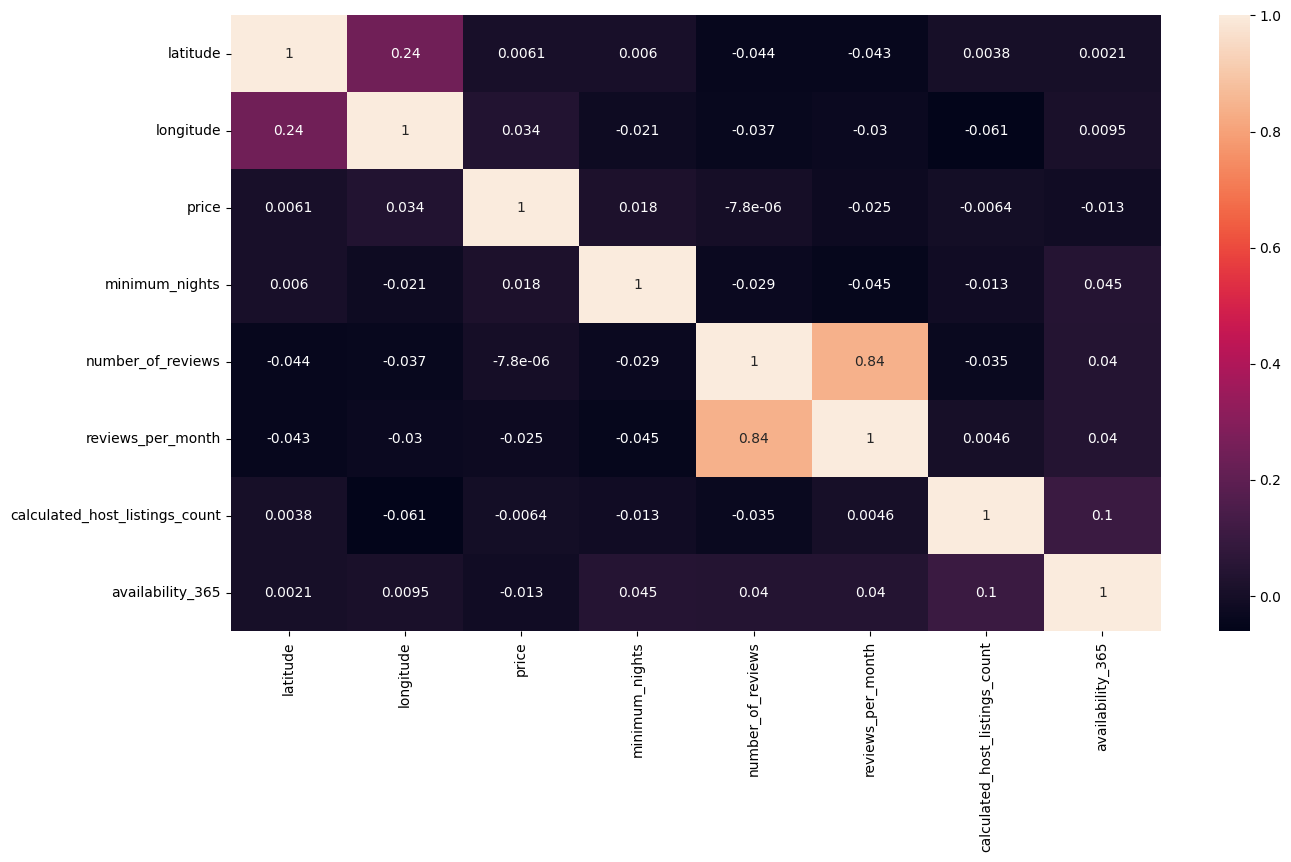

In [24]:
#Mapa de calor de las variables numéricas.
corr = df[numericas].corr(method='spearman')
plt.figure(figsize=(15,8))
sns.heatmap(df[numericas].corr(), annot=True)

<AxesSubplot:>

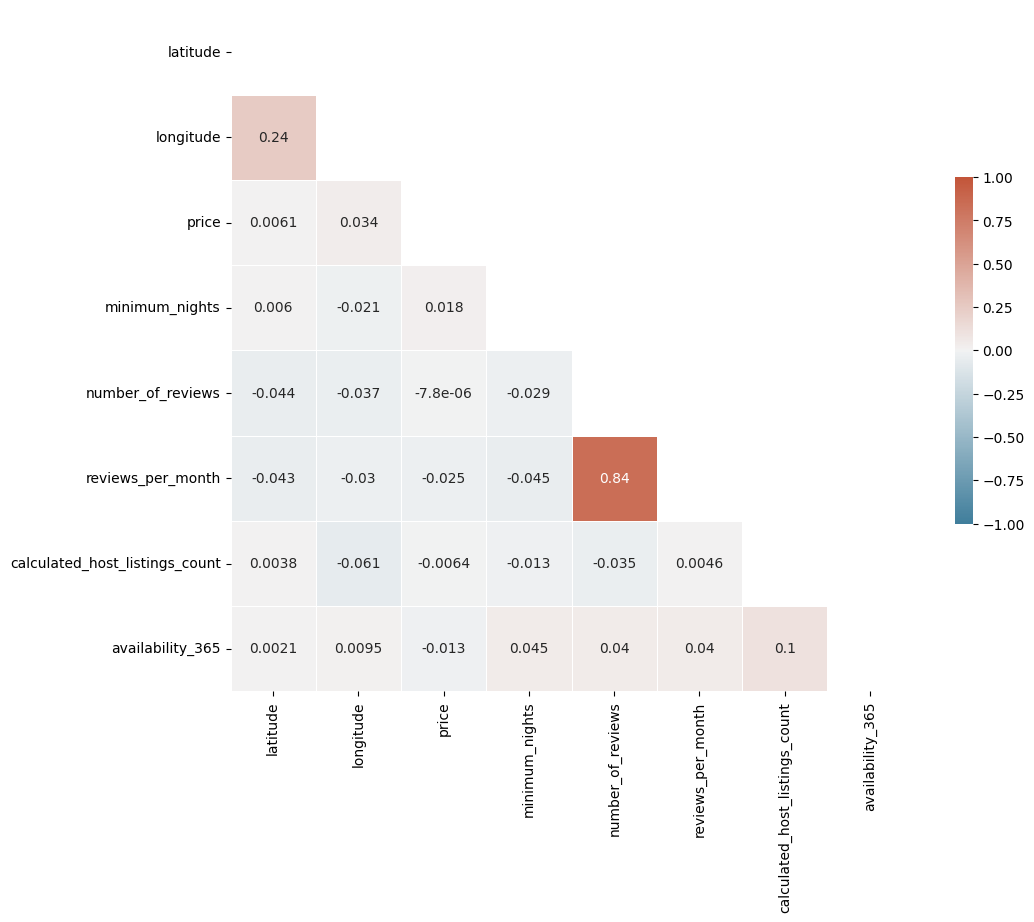

In [25]:
# A continuación se muestra un mapa de calor mas amigable

mask = np.triu(np.ones_like(df[numericas].corr(), dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df[numericas].corr(), mask=mask, cmap=cmap, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

El mapa de calor no ha dado mucha claridad para la contruccion de hipotesis.

# Principales hipotesis:

  + 1. Los barrios centricos son los mas demandados.

  + 2. El precio tambien es un factor que define la demanda de un distrito/barrio. 

  + 3. Existen eventos que condicionen los precios de los hospedajes.




In [26]:
# Hacemos un precio y un distrito haciendo un describe
distrito_precio = df.groupby(['neighbourhood_group']).describe()['price']
distrito_precio

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Arganzuela,1104.0,140.021739,777.923666,0.0,30.75,49.0,77.00,9999.0
Barajas,172.0,119.848837,224.553775,14.0,30.00,43.0,93.75,1500.0
Carabanchel,708.0,85.324859,413.781248,9.0,22.00,36.5,66.00,9999.0
Centro,8649.0,127.051914,496.177131,0.0,41.00,65.0,102.00,9999.0
Chamartín,580.0,112.744828,171.423282,12.0,40.00,66.0,100.25,2200.0
Chamberí,1252.0,115.529553,222.799164,9.0,35.00,58.0,104.25,3500.0
Ciudad Lineal,649.0,105.391371,238.223494,8.0,25.00,40.0,70.00,3000.0
Fuencarral - El Pardo,315.0,117.907937,263.953156,10.0,27.50,50.0,94.00,3000.0
Hortaleza,364.0,138.645604,275.320276,10.0,30.00,59.5,100.00,2500.0


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

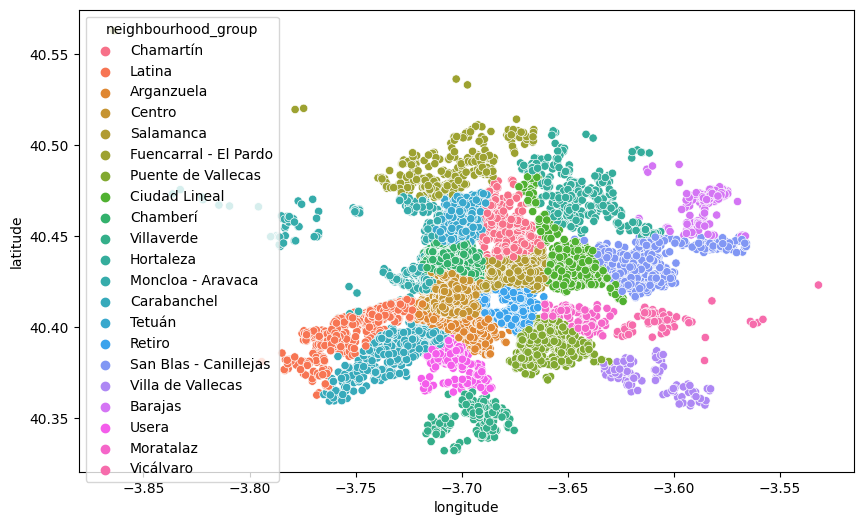

In [27]:
#Creamos un mapa para que se pueda ubicar mejor los distritos. 
plt.ion()
plt.figure(figsize=(10,6))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)


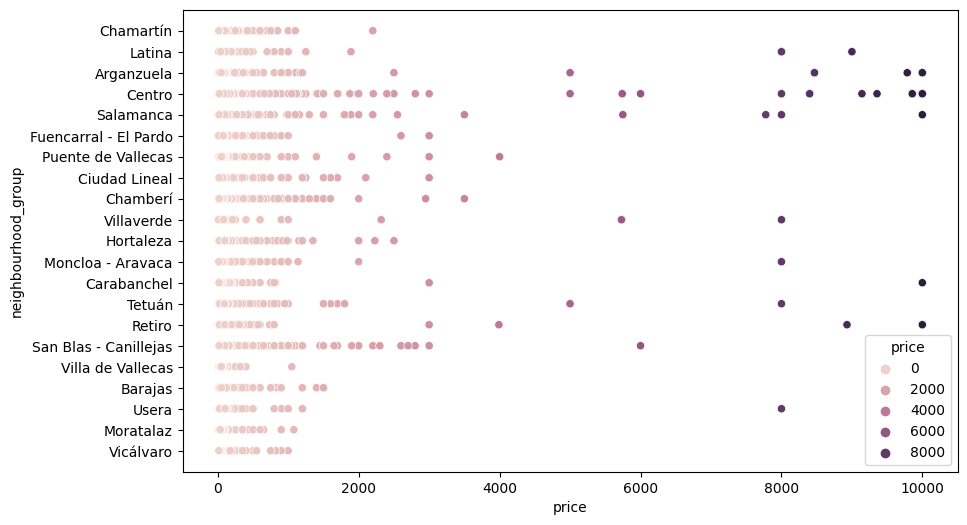

In [29]:
#Usamos el grafico scatterplot para poder observar la relacion de variales e identificar posibles outliers.

sns.scatterplot(data= df, x="price", y="neighbourhood_group", hue="price")
fig = plt.gcf()
fig.set_size_inches(10,6)


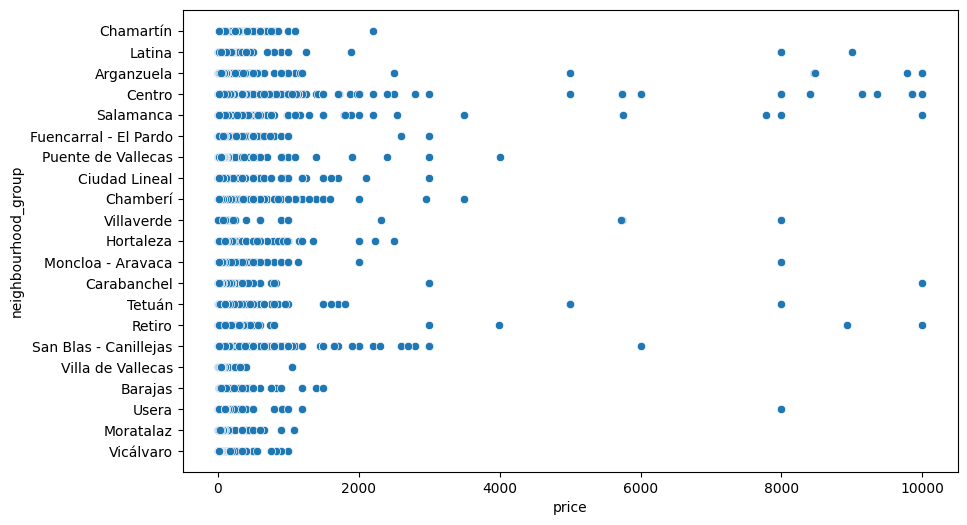

In [30]:

sns.scatterplot(data= df, x="price", y="neighbourhood_group")
fig = plt.gcf()
fig.set_size_inches(10,6)

Aqui podemos observar algunos outliers en zonas que no son tan céntricas, la explicacion que le podemos dar es que se celebrara algun evento en fechas determinadas. 

In [ ]:
# A continuacion, observamos la relacion del precio con el tipo de hospedaje
sns.scatterplot(data= df, x="room_type", y="price", hue="price", palette='mako')

<AxesSubplot:xlabel='room_type', ylabel='price'>

Deducimos que los outliers mas caracteristicos que se observan son en private room, hotel room y shared room. 

In [ ]:
# Histograma en relacion al precio
sns.histplot(data=df, x="price", kde=True)
fig = plt.gcf()
fig.set_size_inches(10,5)

Segun el grafico, la distribucion no es normal al tener una cantidad de outliers significativos.

In [ ]:
#Se grafica el histograma excluyendo los outliers.
sin_outliers = df[df["price"]<300] 
sns.histplot(data=sin_outliers, x="price", kde=True)
fig = plt.gcf()
fig.set_size_inches(10,5)

Se observa que no tenemos una distribucion normal con los precios de los hospedajes en Madrid.

In [ ]:
#Creamos un grafico de barras y vemos la cantidad de pisos que ha publicado cada propietario en cada distrito.

df_group1["host_id"].plot(kind = "bar")
plt.show() 

Comprobamos la hipotesis que en el centro hay una mayor cantidad de hospedajes en alquiler con un **64.5%** del total de anuncios.

In [ ]:
# Creamos un grafico de barras para comprobar outliers de precio segun el distrito.

champions = df.groupby("neighbourhood_group").mean()

champions

champions['price'].plot(kind = 'bar')
plt.show() 


Comprobamos que existen eventos que condicionen los precios de los hospedajes. Uno de esos posibles eventos sería la final de la Champions en el año 2019 en el Wanda Metropolitano, ubicado en San Blas - Canillejas con 97 hospedajes.

In [ ]:
#Creamos un grafico de barras con la libreria plotly, que nos muestra la cantidad de anuncios por distrito

fig = px.bar((df['neighbourhood_group'].value_counts()).to_frame(name="count"), y="count", title="Distritos de Madrid", )
fig.show()


Como vimos en un ejemplo anterior, nos muestra que Centro tiene una mayor cantidad de anuncios.

In [ ]:
# Creamos una nueva variable para filtrar los datos del distriro Centro

datos_centro = df[df["neighbourhood_group"].str.contains("Centro")]
display(datos_centro)

In [ ]:
#Creamos grafico de barras para observar mejor la cantidad de anuncios por barrio dentro del distrito Centro
fig = px.bar((datos_centro['neighbourhood'].value_counts()).to_frame(name="count"), y="count", color=datos_centro['neighbourhood'].value_counts(),title = 'Barrios del Centro')
fig.show()

Pudimos comprobar la hipotesis de que en el distrito Centro el barrio de Embajadores tiene mas anuncios con 2318.

In [ ]:
#Aqui filtramos los datos del distrito San Blas - Canillejas para comprobar la hipotesis del aumento de precios a causa de eventos. 
datos_sanblas = df[df["neighbourhood_group"].str.contains("San Blas - Canillejas")]
display(datos_sanblas)

In [ ]:
#Comprobamos el filtrado de anuncios
datos_sanblas.shape

In [ ]:
#En este caso, nos pudimos dar cuenta que uno de esos eventos fue la final de Champions en el Wanda Metropolitano.
datos_champions = datos_sanblas[datos_sanblas["name"].str.contains("hampion")]
display(datos_champions)

In [ ]:
#Asi, podemos comprobar que la media de los hospedajes relacionados a este evento es de 764 y aumenta considerablemte la media del precio del distrito.
datos_champions.describe()

# Conclusiones

 +  Confirmamos la hipotesis que los barrios centricos son los mas anunciados por la aplicacion de Airbnb. Podemos decir, que los turistas priorizan más la ubicación; ya que, en el distrito del Centro tenemos un 64% de anuncios. Además, dentro de este distrito tenemos a los tres barrios con más hospedajes los cuales son Embajadores, Universidad y Palacio.
 
      - Estamos asumiendo que la oferta va ligada a la demanda en el Centro.
      
 
 +  Debido al analisis de precios que hemos realizado, podemos decir que hay una gran variedad para todos los presupuestos del turista. 
 
 +  Deducimos que el turista prefiere alquilar un apartemeto o casa completa antes que una habitacion de hotel debido a la alta oferta que se ofrece.
 
 +  También, hemos comprobado que la existencia de eventos en determinadas fechas y su localización aumenta los precios de los inmuebles en alquiler. 
 
     - Como por ejemplo, tenemos la final de la Champions celebarada en Madrid en el estadio Wanda Metropolitano ubicado en el distrito de San Blas - Canillejas el año 2019. Ya que, el          promedio del precio de este distrito aumento significativamente debido a este evento.
     
    
 
 

  # Observaciones:
     
   + En algunos casos pudimos observar que algunos propietarios prefieren no poner su nombre y utilizan apodos o distintas combinaciones alfa-numericas para proteger su privacidad.
     
   + Vemos que hay propiterios que tienen más de 100 alojamientos, siendo un ejemplo un host con 163 inmuebles aunciados. 
     
   + Hemos observado alquileres en el año 2020 durante los meses de confinamiento; ya que, Airbnb solo te permite valorar la experiencia del hospedaje máximo quince dias después del checkout. Entendemos que estos datos son posibles outliers.